In [ ]:
# 1. (50%) 15.18 (Project: Determine k in k-Means Clustering) 

In [ ]:
#Importing Iris Datasets

In [51]:
from sklearn import datasets
iris = datasets.load_iris()
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [57]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans      # Pulls in the KMeans algorithm, clusters data by trying to separate samples
                                        # in n groups of equal variance, minimizing a criterion.

In [58]:
features = iris.data                    # Extracting the numerical measurements(the features) and storing them in X.

In [59]:
wcss = []                               # Creating an empty list to store the Inertia(SSE)
for i in range(1,11):                   # Run the following code 10 times
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10, random_state=0)
    kmeans.fit(features)                # The algorithm looks at the data X and tries to find the best 
                                        # centers for the cluster 
    wcss.append(kmeans.inertia_)        # Once done, grab the Interia (all the points from the centes) and 
                                        # save that to the list.

In [60]:
# Plotting/Depicting the data 

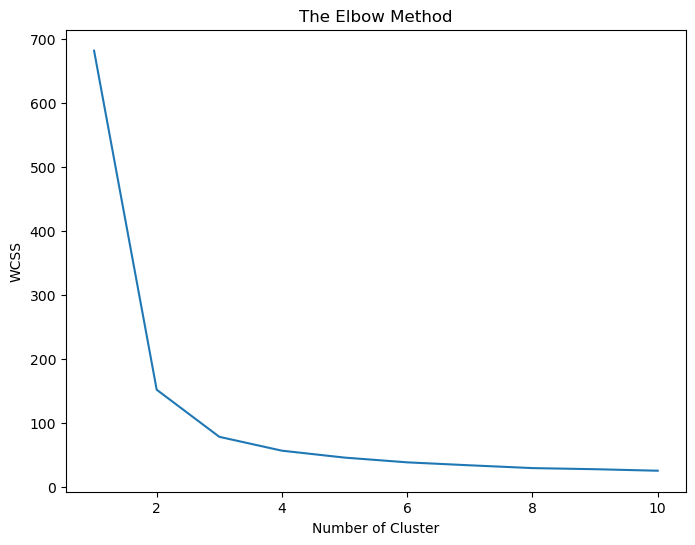

In [97]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss, marker=None)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [98]:
# 2. (50%) Get MNIST dataset as the instructions in 15.21.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import time

Mnist = fetch_openml('mnist_784')               # Downloading the Mnist dataset
features, label = Mnist.data, Mnist. target     # Assigning data to variables 

In [2]:
# Testing and Training 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(Mnist.data, Mnist.target,test_size=0.2, random_state=42) # Splitting 80% training/20% testing 

In [4]:
std_scaler = StandardScaler()  

X_train_std = std_scaler.fit_transform(X_train)  # Calculates the mean and variance, and scales it with the training data.
X_test_std = std_scaler.transform(X_test)        # Repeats the same thing just with the testing data.

In [5]:
# Logistic Regression with no PCA 

In [6]:
start_time_no_pca = time.time()                  # Start the clock
logisticReg = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticReg.fit(X_train, y_train)
end_time_no_pca = time.time()                    # Stops the clock

accuracy_no_pca = logisticReg.score(X_test, y_test)
time_no_pca = end_time_no_pca - start_time_no_pca

In [7]:
# Logistic Regression with PCA 

In [8]:
pca = PCA(0.95)                                # Explains 95% of the data variance 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)             

start_time_pca = time.time()                   # Start the clock
logisticReg_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticReg_pca.fit(X_train_pca, y_train)
end_time_pca = time.time()                     # Stops the clock

accuracy_pca = logisticReg_pca.score(X_test_pca, y_test)
time_pca = end_time_pca - start_time_pca

In [9]:
# Display of the results

In [10]:
print(f"Original number of features: {features.shape[1]}")
print(f"Reduced number of features (95% variance): {pca.n_components_}")
print(f"WITHOUT PCA - Time: {time_no_pca: .2f}s, Acccurary: {accuracy_no_pca:}")
print(f"WITh PCA - Time: {time_pca: .2f}s, Acccurary: {accuracy_pca:}")
print(f"Speedup Factor: {time_no_pca / time_pca:.2f}x")

Original number of features: 784
Reduced number of features (95% variance): 154
WITHOUT PCA - Time:  162.65s, Acccurary: 0.9158571428571428
WITh PCA - Time:  44.98s, Acccurary: 0.9183571428571429
Speedup Factor: 3.62x
